In [1]:
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [2]:
train_angry=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/train_angry.npy")
train_disgust=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/train_disgust.npy")
train_fear=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/train_fear.npy")
train_happy=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/train_happy.npy")
train_neutral=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/train_neutral.npy")
train_sad=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/train_sad.npy")
train_surprise=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/train_surprise.npy")
val_angry=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/validation_angry.npy")
val_disgust=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/validation_disgust.npy")
val_fear=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/validation_fear.npy")
val_happy=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/validation_happy.npy")
val_neutral=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/validation_neutral.npy")
val_sad=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/validation_sad.npy")
val_surprise=np.load("/home/lab/양창희/Emotion Project/face_landmark_npy/validation_surprise.npy")

In [3]:
val_sad[2]

[array([[ 24., 154.],
        [ 41., 174.],
        [ 55., 188.],
        [ 69., 198.],
        [ 86., 212.],
        [103., 215.],
        [120., 219.],
        [147., 222.],
        [171., 205.],
        [182., 178.],
        [182., 150.],
        [178., 126.],
        [171.,  99.],
        [158.,  78.],
        [151.,  58.],
        [144.,  37.],
        [134.,  13.],
        [ 14., 137.],
        [ 17., 126.],
        [ 24., 116.],
        [ 34., 109.],
        [ 45., 102.],
        [ 76.,  65.],
        [ 79.,  51.],
        [ 86.,  41.],
        [ 93.,  30.],
        [103.,  24.],
        [ 86., 109.],
        [ 99., 130.],
        [113., 150.],
        [123., 161.],
        [113., 178.],
        [120., 174.],
        [127., 171.],
        [130., 161.],
        [134., 154.],
        [ 38., 140.],
        [ 41., 133.],
        [ 48., 123.],
        [ 62., 119.],
        [ 58., 130.],
        [ 48., 137.],
        [ 93.,  82.],
        [ 96.,  68.],
        [103.,  58.],
        [1

In [4]:
list_emo=[]
list_emo.append(train_angry)
list_emo.append(val_angry)
list_emo.append(train_disgust)
list_emo.append(val_disgust)
list_emo.append(train_fear)
list_emo.append(val_fear)
list_emo.append(train_happy)
list_emo.append(val_happy)
list_emo.append(train_neutral)
list_emo.append(val_neutral)
list_emo.append(train_sad)
list_emo.append(val_sad)
list_emo.append(train_surprise)
list_emo.append(val_surprise)


In [5]:
def reshape(x):
    reshape_angry=[]
    for i in range(len(x)):
        new=x[i][0]
        reshape_angry.append(new)
    reshape_angry=np.array(reshape_angry)
    return reshape_angry

In [6]:
def new_list(x):
    result_angry=[]
    for i in range(len(x)):
        result_angry1=[]
        for j in range(len(x[0])-1):
            if (j != 16) and (j != 21) and (j != 26) and (j != 30) and (j != 35) and (j != 41) and (j != 47) and (j != 59):
                if x[i][j][0]==x[i][j+1][0]:
                    var_x=150
                    var_y=x[i][j][1]-x[i][j+1][1]
                    gradient=var_y/var_x
                    result_angry1.append(gradient)
                else:
                    var_x=x[i][j][0]-x[i][j+1][0]
                    var_y=x[i][j][1]-x[i][j+1][1]
                    gradient=var_y/var_x
                    result_angry1.append(gradient)
        result_angry.append(result_angry1)
    result_angry=np.array(result_angry)
    return result_angry


In [7]:
def make_data(x):
    list_1=[]
    for i in range(len(x)):
        new_data=reshape(x[i])
        new_data=np.array(new_data)
        list_1.append(new_data)
    list_2=[]
    for i in range(len(list_1)):
        new_data1=new_list(list_1[i])
        new_data1=np.array(new_data1)
        list_2.append(new_data1)
    
    return list_2

In [8]:
remake_list_emo=make_data(list_emo)

In [9]:
type(remake_list_emo[2])

numpy.ndarray

In [10]:
input_data=np.concatenate((remake_list_emo[0],remake_list_emo[1],remake_list_emo[2],remake_list_emo[3],remake_list_emo[4],remake_list_emo[5],
                          remake_list_emo[6],remake_list_emo[7],remake_list_emo[8],remake_list_emo[9],remake_list_emo[10],remake_list_emo[11],
                          remake_list_emo[12],remake_list_emo[13]),axis=0)

In [11]:
input_data=np.array(input_data,dtype=np.float16)

In [12]:
input_data.shape

(35528, 59)

In [14]:
input_data[1]

array([ -0.2   ,   7.5   ,  13.    ,   3.25  ,   1.467 ,   1.363 ,
         0.6113,   0.3235,  -0.0909,  -0.522 ,  -0.778 ,  -1.211 ,
        -2.637 ,  -3.715 ,  -3.25  , -11.336 ,  -0.636 ,  -0.    ,
        -0.    ,   0.636 ,  -0.2856,  -0.2666,   0.2106,   0.7334,
        -4.75  ,  -0.12  ,  -4.75  ,  -0.    ,   0.2727,  -0.    ,
        -0.375 ,  -0.5   ,  -0.    ,   1.    ,   0.    ,   0.    ,
        -0.636 ,  -0.    ,   0.636 ,  -0.3635,   0.    ,  -1.    ,
        -0.636 ,   0.4285,  -0.75  ,   0.4666,   0.7334,  -0.533 ,
        -0.2727,   0.    ,   0.2727,   0.5713,  -0.2106,  -0.    ,
         0.5   ,   0.1364,   0.1364,   0.    ,   0.    ], dtype=float16)

In [13]:
np.save("gradient_emo.npy",input_data)

In [15]:
#input_data=np.round_(input_data,2)

In [16]:
label=np.load("label_landmark.npy")

In [17]:
label.shape

(35528,)

In [18]:
np.isfinite(input_data).all()# True가 나와야함

True

In [20]:
# np.where(input_data==False)[0] 위치 찾는 코드

In [24]:
np.argwhere(np.isnan(input_data))

array([], shape=(0, 2), dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(input_data, label, test_size=0.3, 
                     stratify=label,
                     random_state=0)

데이터 안에 NAN 이나 infinite값이 있을 때 확인

In [20]:
import numpy
numpy.isfinite(X_train).all()
numpy.argwhere(numpy.isnan(X_train))

array([], shape=(0, 2), dtype=int64)

데이터 표준화

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [22]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\n고윳값 \n%s' % eigen_vals)


고윳값 
[13.44389855  3.61062454  2.56531567  2.44184575  2.0762397   1.52356744
  1.34358713  1.2287192   1.1532851   1.12152934  1.09152352  1.07600574
  0.97964612  0.93926436  0.91575765  0.24432744  0.84756216  0.83506777
  0.81956265  0.80180845  0.77855347  0.2891692   0.29862436  0.73253852
  0.71967241  0.32717481  0.34544312  0.34766225  0.69369523  0.6795865
  0.66907756  0.37500017  0.37711899  0.38686155  0.39765865  0.64802906
  0.40916885  0.63443595  0.42455887  0.42747609  0.61682925  0.44162119
  0.60588553  0.59412178  0.58214339  0.5707988   0.45423589  0.45906248
  0.47367798  0.47643144  0.48348931  0.55695106  0.49886806  0.54584327
  0.53858217  0.53514885  0.51086706  0.51616655  0.52002803]


In [23]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

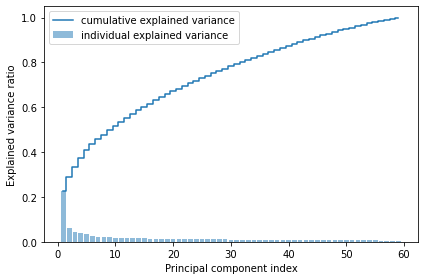

In [24]:
import matplotlib.pyplot as plt


plt.bar(range(1, 60), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 60), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 특성 변환

In [25]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플을 정렬합니다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [26]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-9.04790657e-02  1.49856188e-01]
 [-5.22105953e-02  2.23738573e-01]
 [-3.06283374e-02  2.24023790e-01]
 [ 1.33763160e-02  1.35709598e-01]
 [ 9.60829057e-02 -1.05308721e-01]
 [ 8.39539818e-02 -1.48971561e-01]
 [ 8.81071871e-02 -1.17440005e-01]
 [ 1.03137989e-01 -6.16118932e-02]
 [ 1.17907497e-01  5.92726365e-02]
 [ 1.03847173e-01  1.01707195e-01]
 [ 1.12603323e-01  1.32562196e-01]
 [ 8.13057811e-02  6.27678826e-02]
 [-1.85518520e-02 -1.35639726e-01]
 [-7.50137080e-02 -2.15016861e-01]
 [-8.38574684e-02 -2.04966623e-01]
 [-1.19601507e-01 -9.59469111e-02]
 [ 3.35455251e-02 -2.51673973e-01]
 [ 1.48040623e-01 -1.79301900e-01]
 [ 1.63675788e-01 -1.32443062e-01]
 [ 1.77684996e-01 -1.25619470e-01]
 [ 1.84987472e-01  7.71935718e-02]
 [ 1.97113001e-01  1.14334720e-01]
 [ 1.55491329e-01  1.43250291e-01]
 [ 6.69450153e-02  2.13842042e-01]
 [-1.16396470e-01  9.92406157e-05]
 [-1.07717892e-01 -1.55791010e-02]
 [-1.52827829e-01 -1.95999564e-03]
 [ 1.36745481e-01 -1.62178534e-01]
 [ 1.58736

In [27]:
X_train_std[0].dot(w)

array([ 2.09119101, -3.69733259])

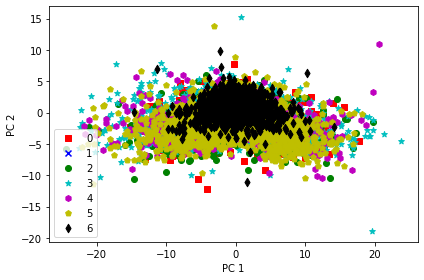

In [28]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g','c','m','y','k']
markers = ['s', 'x', 'o','*','h','p','d']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.2278573 , 0.06119558, 0.0434789 , 0.04138624, 0.03518967,
       0.02582257, 0.02277212, 0.02082526, 0.01954674, 0.01900852,
       0.01849996, 0.01823695, 0.01660378, 0.01591936, 0.01552095,
       0.01436512, 0.01415336, 0.01389056, 0.01358965, 0.01319551,
       0.01241561, 0.01219755, 0.01175727, 0.01151814, 0.01134003,
       0.01098328, 0.0107529 , 0.01045449, 0.010269  , 0.01006962,
       0.0098666 , 0.00967433, 0.00943963, 0.00925136, 0.0091283 ,
       0.0090701 , 0.00881383, 0.00874838, 0.00865856, 0.00845519,
       0.00819454, 0.00807492, 0.00802825, 0.00778054, 0.00769873,
       0.00748493, 0.00724519, 0.00719574, 0.0069349 , 0.00673982,
       0.00655682, 0.0063917 , 0.00635578, 0.00589244, 0.00585483,
       0.0055452 , 0.00506131, 0.00490106, 0.00414105])

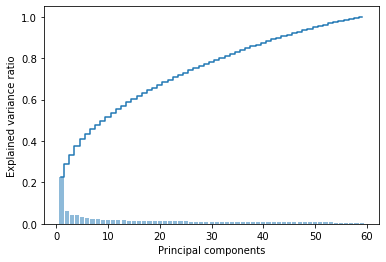

In [30]:
plt.bar(range(1, 60), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 60), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [31]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

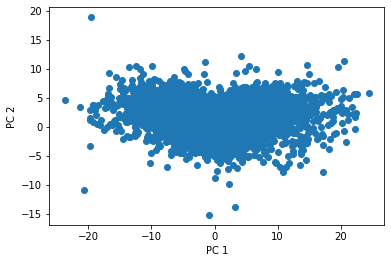

In [32]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    colors = ('r', 'b', 'g','c','m','y','k')
    markers = ('s', 'x', 'o','*','h','p','d')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap.colors[idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_pca, y_train)

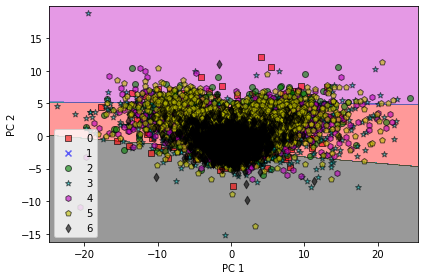

In [35]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

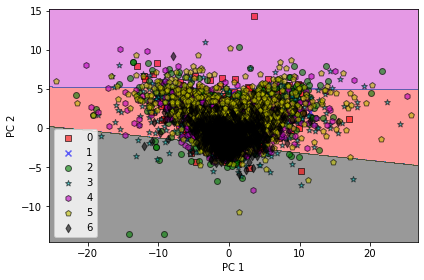

In [36]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [37]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 1.4648e-01  2.8467e-01  2.0850e-01  1.4209e-01  6.7810e-02  3.0151e-02
  3.4149e-02  2.0920e-02  3.7567e-02  1.4905e-01  2.7084e-04 -3.7689e-02
 -1.9397e-01 -1.8799e-01 -1.7224e-01 -1.2463e-01  1.3525e-01  1.0083e-01
  5.1758e-02  2.2507e-02  1.2152e-01  3.7598e-02 -4.7150e-02 -1.4624e-01
 -6.7139e-02 -1.3464e-01 -6.1493e-02  6.2286e-02  7.8735e-02  9.4360e-02
 -2.1423e-02  1.3733e-01  1.9150e-02 -4.5135e-02  1.1969e-01  5.3558e-02
  7.1960e-02  1.1823e-01 -5.4169e-02  1.1151e-01  8.2336e-02 -4.4434e-02
 -5.1361e-02  6.1798e-03  1.6129e-02  2.0813e-02  1.4648e-01 -2.0020e-02
  7.1106e-02  6.9641e-02  2.8000e-02  8.0139e-02 -6.2073e-02  1.9867e-02
  4.2633e-02  5.2368e-02  7.9407e-02  2.2400e-02  7.1287e-04]

MV 2: [ 0.0343  0.0122 -0.0145 -0.0127  0.0013  0.0203 -0.0311 -0.0105 -0.0216
  0.0406  0.0086 -0.0095  0.0331  0.0242 -0.0108 -0.0142 -0.0302  0.0115
  0.0097 -0.0324  0.0674  0.0457  0.0281  0.0278  0.0225 -0.0187  0.0059
  0.0048  0.0237  0.0147  0.0059  0.018   0.0174 

In [38]:
d = 59 # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬: 59x59


In [39]:
print('클래스 레이블 분포: %s' 
      % np.bincount(y_train)[1:])

클래스 레이블 분포: [ 381 3533 6260 4306 4183 2778]


In [40]:
d = 59  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T, bias=True)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 59x59


In [41]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # 열 벡터로 만들기
d = 59  # 특성의 수
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 59x59


In [42]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [43]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 큰 값에서 작은 값 순서대로 정렬합니다.
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 고윳값의 역순으로 올바르게 정렬되었는지 확인합니다.

print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값:

1002.4747229657577
63.58679769026027
53.12845632194094
0.19683842372835172
0.18726732393148787
0.07898095842418189
0.07271540291307016
0.06498062392630614
0.05248411786988496
0.052170738914118255
0.04522021227677469
0.04062026849593081
0.03813513614735782
0.030629489766744962
0.0294653046802495
0.027636277971535107
0.025348039995555936
0.023640819148740094
0.022817975475124503
0.018839881412796872
0.015408057428293704
0.013992013622079807
0.011967315105448309
0.011925168147029359
0.009494948480157592
0.008799761046310577
0.00844804126647658
0.008267303702672337
0.007158713018527129
0.006693369633122083
0.006377650152273395
0.005677134077633082
0.00524292283609311
0.005120450992917277
0.0037771041217091344
0.0036362396552863407
0.0035843304851989
0.00325005532689645
0.0030549608559231494
0.0028900291774498535
0.0027973739842129747
0.002581222094864582
0.0023067805618263767
0.0018004269863907683
0.0016867201457974692
0.001679722330835749
0.0015682117863510387
0.00151064704117

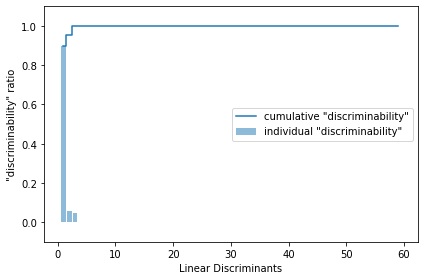

In [44]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 60), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 60), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [45]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W:\n', w)

행렬 W:
 [[ 1.6247e-01  1.0145e-02]
 [ 5.8719e-02  1.5298e-01]
 [-4.0904e-02  1.1568e-01]
 [-1.5175e-02  2.7022e-02]
 [ 7.9235e-02  8.0971e-02]
 [ 1.3847e-01 -1.3322e-01]
 [-1.3706e-01  9.3737e-02]
 [-2.0238e-02  8.2876e-02]
 [-1.1236e-01  9.7359e-02]
 [-4.0191e-02  1.2580e-01]
 [-7.1661e-02 -9.9083e-02]
 [-3.7745e-02 -5.4736e-02]
 [ 4.6614e-02 -1.5606e-01]
 [-2.5503e-02 -9.1713e-02]
 [-6.6696e-02  3.4521e-02]
 [-1.2099e-01  8.7343e-03]
 [ 5.9229e-02  2.4043e-01]
 [ 1.7190e-01  9.9570e-02]
 [ 1.6652e-01 -1.0866e-01]
 [-1.1413e-01  1.7815e-01]
 [ 3.9192e-02 -1.3636e-01]
 [-3.9966e-02 -2.5366e-01]
 [-1.0883e-01 -8.1152e-02]
 [-7.4583e-02 -2.5748e-01]
 [ 9.2794e-05 -6.3345e-02]
 [ 1.5353e-02 -1.3125e-04]
 [ 3.1227e-02 -7.9862e-02]
 [-6.8963e-02  2.0883e-02]
 [ 6.0786e-02  8.5211e-02]
 [-1.4179e-02  6.9808e-02]
 [ 8.2692e-02 -9.7875e-02]
 [ 1.4520e-01 -3.0638e-04]
 [ 1.3563e-01 -2.1441e-01]
 [-5.6600e-03 -8.8978e-02]
 [-9.2480e-02  2.4191e-01]
 [-8.3331e-02  7.2794e-02]
 [ 2.6764e-02 -5.1883

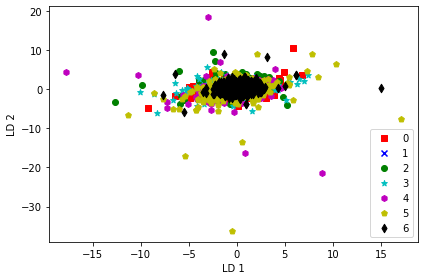

In [46]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g','c','m','y','k']
markers = ['s', 'x', 'o','*','h','p','d']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

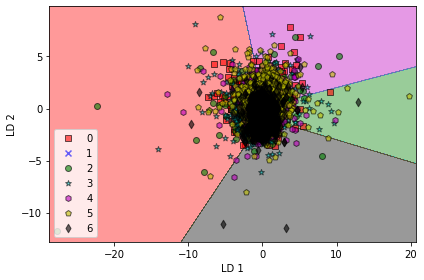

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

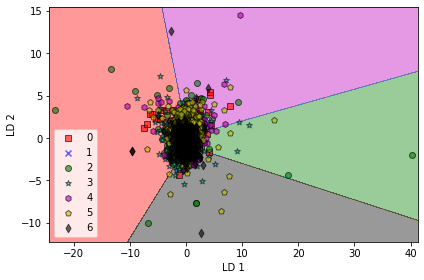

In [49]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()